# Analyze Sisma2016 open data and Models Sisma2016 Variables in terms of Mobile Phone and Distances

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from stargazer.stargazer import Stargazer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
# non molto utile, sono i comuni fuori da cratere

df0 = pd.read_csv('sisma2016_data/Elenco dei Comuni Fuori Cratere da cui risultano perventue RCR.CSV',sep=';',na_values=['-'])
df0 = df0.drop(['Provincia'],axis='columns')
df0.head(2)

,Comune,RCR Danni Lievi,RCR Danni Gravi,RCR Totali
0,Acquaviva Picena,3.0,2.0,5
1,Agugliano,NaN,1.0,1


In [4]:
df = pd.read_csv('sisma2016_data/Ricostruzione Privata.CSV',sep=';',na_values=['-'])
df = df.drop(['PROVINCIA','DOMANDE / EDIFICI INAGIBILI DL.1','DOMANDE / EDIFICI INAGIBILI DL'],axis='columns')
df

,Comune,DOMANDE DL,DOMANDE DG,TOT,DI CUI ACCOLTE,CANTIERI AVVIATI,CANTIERI CONCLUSI,DL,DG
0,Monteleone di Fermo,11,NaN,11,3.0,3.0,2.0,13.000,51.000
1,Folignano,57,15.0,72,46.0,46.0,27.0,74.000,102.000
2,Castel di Lama,73,50.0,123,83.0,83.0,43.0,95.000,130.000
3,Fiastra,138,83.0,221,131.0,131.0,75.0,180.000,476.000
4,Esanatoglia,80,9.0,89,55.0,55.0,49.0,106.000,141.000
...,...,...,...,...,...,...,...,...,...
133,Norcia,728,196.0,924,449.0,449.0,230.0,1.324,2.236
134,Cerreto di Spoleto,53,7.0,60,20.0,20.0,8.0,100.000,82.000
135,Montefranco,13,1.0,14,4.0,4.0,NaN,25.000,13.000
136,Preci,94,32.0,126,48.0,48.0,20.0,236.000,418.000


In [18]:

df = df.fillna(0)
df['DOMANDE DL / DL'] = df['DOMANDE DL'] / df['DL']
df['DOMANDE DG / DG'] = df['DOMANDE DG'] / df['DG']
df.columns = ['Comune','SMALL DAMAGE REQ.', 'GREAT DAMAGE REQ.', 'TOT REQ.','ACCEPTED REQ.',
              'BUILDING STARTED', 'BUILIDING CONCLUDED','SMALL DAMAGE','GREAT DAMAGE',
              'SMALL DAMAGE REQ/ACTUAL','GREAT DAMAGE REQ/ACTUAL']
df['TOT. DAMAGE'] = df['SMALL DAMAGE'] + df['GREAT DAMAGE']
df.head(2)

,Comune,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,BUILIDING CONCLUDED,SMALL DAMAGE,GREAT DAMAGE,SMALL DAMAGE REQ/ACTUAL,GREAT DAMAGE REQ/ACTUAL,TOT. DAMAGE
0,Monteleone di Fermo,11,0.0,11,3.0,3.0,2.0,13.0,51.0,0.846154,0.000000,64.0
1,Folignano,57,15.0,72,46.0,46.0,27.0,74.0,102.0,0.770270,0.147059,176.0


In [19]:
df1 = pd.read_csv('sisma2016_data/Sintesi della Ricostruzione nel Territorio.CSV',sep=';',na_values=['-'])
df1 = df1.drop(['PR','Tecnici','Amministrativi','Altro','Totale '],axis='columns')
df1 = df1.fillna(0)
df1['RCR Presentate VS Attese -tasso di copertura- (%) '] = df1['RCR Presentate '] / df1['RCR Attese ']
df1.columns = ['Comune','RCR FORECAST','RCR ACTUAL','RCR FORECAST / ACTUAL','OOPP']
df1.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP
0,Acquasanta Terme,1295,271.0,0.209266,2
1,Amandola,936,123.0,0.131410,5


In [20]:
df1 = df1.merge(df)
df1.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,BUILIDING CONCLUDED,SMALL DAMAGE,GREAT DAMAGE,SMALL DAMAGE REQ/ACTUAL,GREAT DAMAGE REQ/ACTUAL,TOT. DAMAGE
0,Acquasanta Terme,1295,271.0,0.209266,2,226,124.0,350,175.0,175.0,98.0,465.0,834.0,0.486022,0.148681,1299.0
1,Amandola,936,123.0,0.131410,5,140,53.0,193,85.0,85.0,32.0,350.0,596.0,0.400000,0.088926,946.0


In [22]:
x_regression = pd.read_csv('quake_data/X_regression.csv')
x_regression.head(2)

,Comune,Cratere Centro Italia 2016,media_prima,media_dopo,varPhones,Variaz,Distance_from_epicenter,"AGRICOLTURA, SILVICOLTURA E PESCA",ALTRE ATTIVITÀ DI SERVIZI,AMMINISTRAZIONE PUBBLICA E DIFESA; ASSICURAZIONE SOCIALE OBBLIGATORIA,...,COSTRUZIONI,ESTRAZIONE DI MINERALI DA CAVE E MINIERE,"FORNITURA DI ACQUA; RETI FOGNARIE, ATTIVITÀ DI GESTIONE DEI RIFIUTI E RISANAMENTO","FORNITURA DI ENERGIA ELETTRICA, GAS, VAPORE E ARIA CONDIZIONATA",ISTRUZIONE,"NOLEGGIO, AGENZIE DI VIAGGIO, SERVIZI DI SUPPORTO ALLE IMPRESE",ORGANIZZAZIONI ED ORGANISMI EXTRATERRITORIALI,SANITA' E ASSISTENZA SOCIALE,SERVIZI DI INFORMAZIONE E COMUNICAZIONE,TRASPORTO E MAGAZZINAGGIO
0,Abbateggio,0.0,1633.760638,1760.015597,0.077279,-14.463097,0.938927,0.0,0.0,0.0,...,0.75122,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,Acciano,0.0,2560.456228,2732.586008,0.067226,-14.871586,0.328794,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.228916,0.0,0.0,0.0,0.0


In [23]:
ateco_names = ['AGRICOLTURE', 'OTHER','PUBLIC ADMINISTRATION','HOUSING',
       'ARTS AND ENTERTAINMENT','HOTELS AND RESTAURANTS',
       'FINANCE', 'MANUFACTURING','TECH PROFESSIONAL',
       'COMMERCE','BUILDINGS', 'MINING',
       'WATER AND WASTE','GAS AND ELECTRICITY',
       'EDUCATION','SERVICES AND OPERATIONS',
       'EXTRATERRITORIAL ORG.','HEALTH SERVICES',
       'COMMUNICATION AND INFORMATION SERV.','LOGISTICS']

x_regression.columns = ['Comune', 'CRATER', 'PHONE_BEFORE', 'PHONE_AFTER',
       'PCGH', 'MPE', 'DISTANCE FROM EPICENTER']+ateco_names
       

In [24]:
istat = pd.read_csv('quake_data/alldata_reshape.csv')
istat = istat[['Comune','pop_iniz_2016']]
istat

,Comune,pop_iniz_2016
0,Acciano,335.0
1,Accumoli,655.0
2,Acquasanta Terme,2935.0
3,Acquasparta,4705.0
4,Acquaviva Picena,3829.0
...,...,...
380,Varco Sabino,185.0
381,Venarotta,2079.0
382,Villa Sant'Angelo,440.0
383,Villa Santa Lucia degli Abruzzi,125.0


In [25]:
xy = df1.merge(x_regression).merge(istat)
to_norm = ['RCR FORECAST','RCR ACTUAL','OOPP','SMALL DAMAGE REQ.',
           'GREAT DAMAGE REQ.','TOT REQ.','ACCEPTED REQ.',
           'BUILDING STARTED','BUILIDING CONCLUDED',
           'SMALL DAMAGE','GREAT DAMAGE','TOT. DAMAGE']
for n in to_norm:
    xy[n] = xy[n] / xy['pop_iniz_2016']
xy.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,...,MINING,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,pop_iniz_2016
0,Acquasanta Terme,0.441227,0.092334,0.209266,0.000681,0.077002,0.042249,0.119250,0.059625,0.059625,...,0.069939,0.0,0.0,0.000000,0.003501,0.0,0.001065,0.000000,0.035921,2935.0
1,Amandola,0.260000,0.034167,0.131410,0.001389,0.038889,0.014722,0.053611,0.023611,0.023611,...,0.000000,0.0,0.0,0.000579,0.051688,0.0,0.000000,0.042069,0.000000,3600.0


In [26]:
cod_reg_nome = pd.DataFrame({'COD_REG':[10,11,12,13],'Regione':['UMBRIA','MARCHE','LAZIO','ABRUZZO']})
comune_regione = pd.read_csv('quake_data/comune_regione.csv').merge(cod_reg_nome)[['Comune','Regione']]
xy = xy.merge(comune_regione)
xy.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,...,WATER AND WASTE,GAS AND ELECTRICITY,EDUCATION,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,pop_iniz_2016,Regione
0,Acquasanta Terme,0.441227,0.092334,0.209266,0.000681,0.077002,0.042249,0.119250,0.059625,0.059625,...,0.0,0.0,0.000000,0.003501,0.0,0.001065,0.000000,0.035921,2935.0,MARCHE
1,Amandola,0.260000,0.034167,0.131410,0.001389,0.038889,0.014722,0.053611,0.023611,0.023611,...,0.0,0.0,0.000579,0.051688,0.0,0.000000,0.042069,0.000000,3600.0,MARCHE


In [27]:
regioni = pd.get_dummies(xy['Regione']) #one hot encoding
xy = pd.concat([xy,regioni],axis='columns').drop(['Regione'],axis='columns')
xy.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,...,SERVICES AND OPERATIONS,EXTRATERRITORIAL ORG.,HEALTH SERVICES,COMMUNICATION AND INFORMATION SERV.,LOGISTICS,pop_iniz_2016,ABRUZZO,LAZIO,MARCHE,UMBRIA
0,Acquasanta Terme,0.441227,0.092334,0.209266,0.000681,0.077002,0.042249,0.119250,0.059625,0.059625,...,0.003501,0.0,0.001065,0.000000,0.035921,2935.0,0,0,1,0
1,Amandola,0.260000,0.034167,0.131410,0.001389,0.038889,0.014722,0.053611,0.023611,0.023611,...,0.051688,0.0,0.000000,0.042069,0.000000,3600.0,0,0,1,0


In [28]:
xy.columns

Index(['Comune', 'RCR FORECAST', 'RCR ACTUAL', 'RCR FORECAST / ACTUAL', 'OOPP',
       'SMALL DAMAGE REQ.', 'GREAT DAMAGE REQ.', 'TOT REQ.', 'ACCEPTED REQ.',
       'BUILDING STARTED', 'BUILIDING CONCLUDED', 'SMALL DAMAGE',
       'GREAT DAMAGE', 'SMALL DAMAGE REQ/ACTUAL', 'GREAT DAMAGE REQ/ACTUAL',
       'TOT. DAMAGE', 'CRATER', 'PHONE_BEFORE', 'PHONE_AFTER', 'PCGH', 'MPE',
       'DISTANCE FROM EPICENTER', 'AGRICOLTURE', 'OTHER',
       'PUBLIC ADMINISTRATION', 'HOUSING', 'ARTS AND ENTERTAINMENT',
       'HOTELS AND RESTAURANTS', 'FINANCE', 'MANUFACTURING',
       'TECH PROFESSIONAL', 'COMMERCE', 'BUILDINGS', 'MINING',
       'WATER AND WASTE', 'GAS AND ELECTRICITY', 'EDUCATION',
       'SERVICES AND OPERATIONS', 'EXTRATERRITORIAL ORG.', 'HEALTH SERVICES',
       'COMMUNICATION AND INFORMATION SERV.', 'LOGISTICS', 'pop_iniz_2016',
       'ABRUZZO', 'LAZIO', 'MARCHE', 'UMBRIA'],
      dtype='object')

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


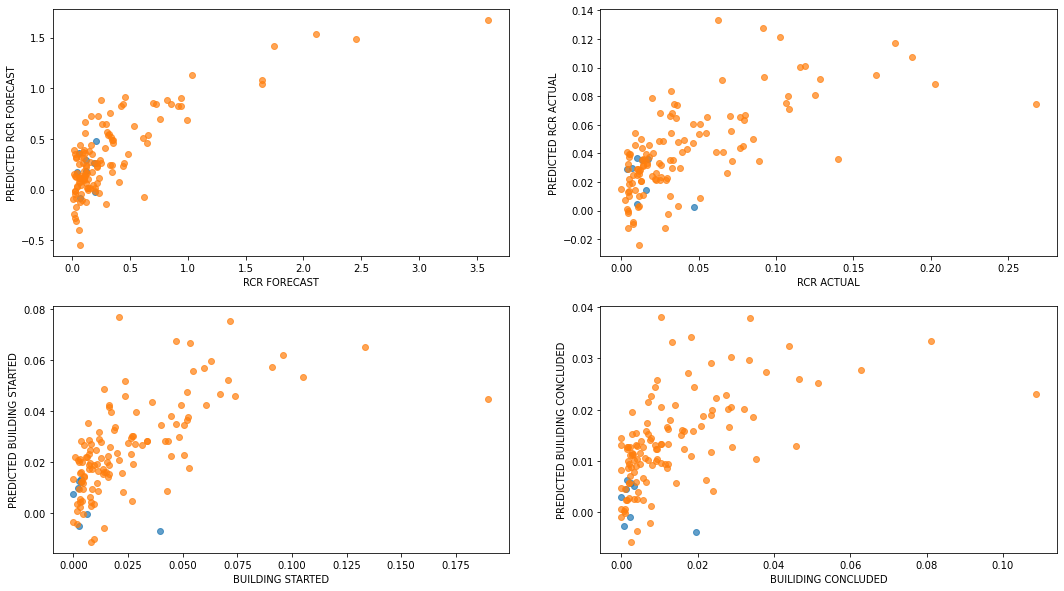

In [32]:

# DIVERSE POSSIBILITA PER LA X DELLA REGRESSIONE
regioni_cols = list(regioni.columns)

#feat = ['DISTANCE FROM EPICENTER','MPE']+ateco_names+regioni_cols
feat = ['DISTANCE FROM EPICENTER','MPE']+regioni_cols
#feat = ['MPE']
#feat = ['DISTANCE FROM EPICENTER']

#x = xy.loc[:,x_regression.columns].drop(,axis='columns')
x = xy.loc[:,feat]
x = sm.add_constant(x)


# TS SONO LE Y DELLA REGRESSIONE, FACCIO UNA REGRESSIONE PER OGNI ELEMENTO DI TS
# E GENERO UN MODELLO DI CONSEGUENZA


ts = ['RCR FORECAST','RCR ACTUAL','BUILDING STARTED','BUILIDING CONCLUDED']
models = []

plt.figure(figsize = (18, 10))
for i in range(len(ts)):
    t = ts[i]
    y = xy.loc[:,t] 
    model = sm.OLS(y, x).fit()
    models.append(model)
    yp = model.predict(x)
    plt.subplot(2,int(len(ts)/2),i+1)
    plt.scatter(y[xy.loc[xy['CRATER']==0,:].index],yp[xy.loc[xy['CRATER']==0,:].index],alpha=0.7)
    plt.scatter(y[xy.loc[xy['CRATER']==1,:].index],yp[xy.loc[xy['CRATER']==1,:].index],alpha=0.7)
    plt.xlabel(y.name)
    plt.ylabel('PREDICTED '+y.name)
plt.savefig('images/sisma16.pdf',bbox_inches='tight')  
plt.show()

stargazer = Stargazer(models)
with open('models/sisma16_regioni.tex','w') as f:
    f.write(stargazer.render_latex())
stargazer

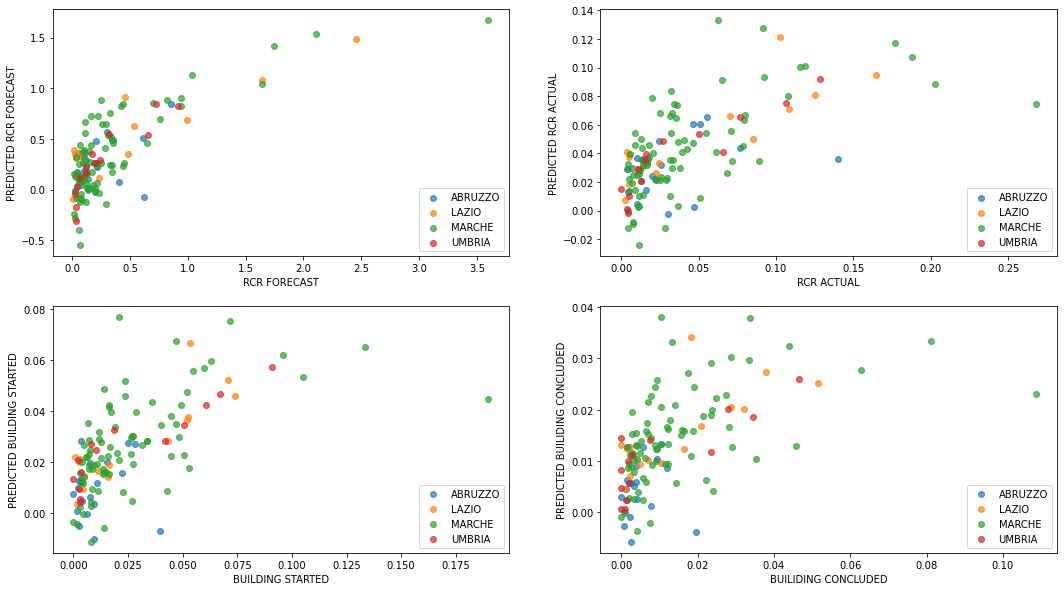

In [33]:
plt.figure(figsize = (18,10))
for i in range(len(ts)):
    t = ts[i]
    y = xy.loc[:,t] 
    yp = models[i].predict(x)
    plt.subplot(2,int(len(ts)/2),i+1)
    for r in regioni_cols:
        x_ = xy.loc[xy[r]==1,:]
        plt.scatter(y[x_.index],yp[x_.index],alpha=0.7,label=r)
    plt.xlabel(y.name)
    plt.ylabel('PREDICTED '+y.name)
    plt.legend(loc='lower right')
plt.savefig('images/sisma16_regioni.pdf',bbox_inches='tight')  
plt.show()

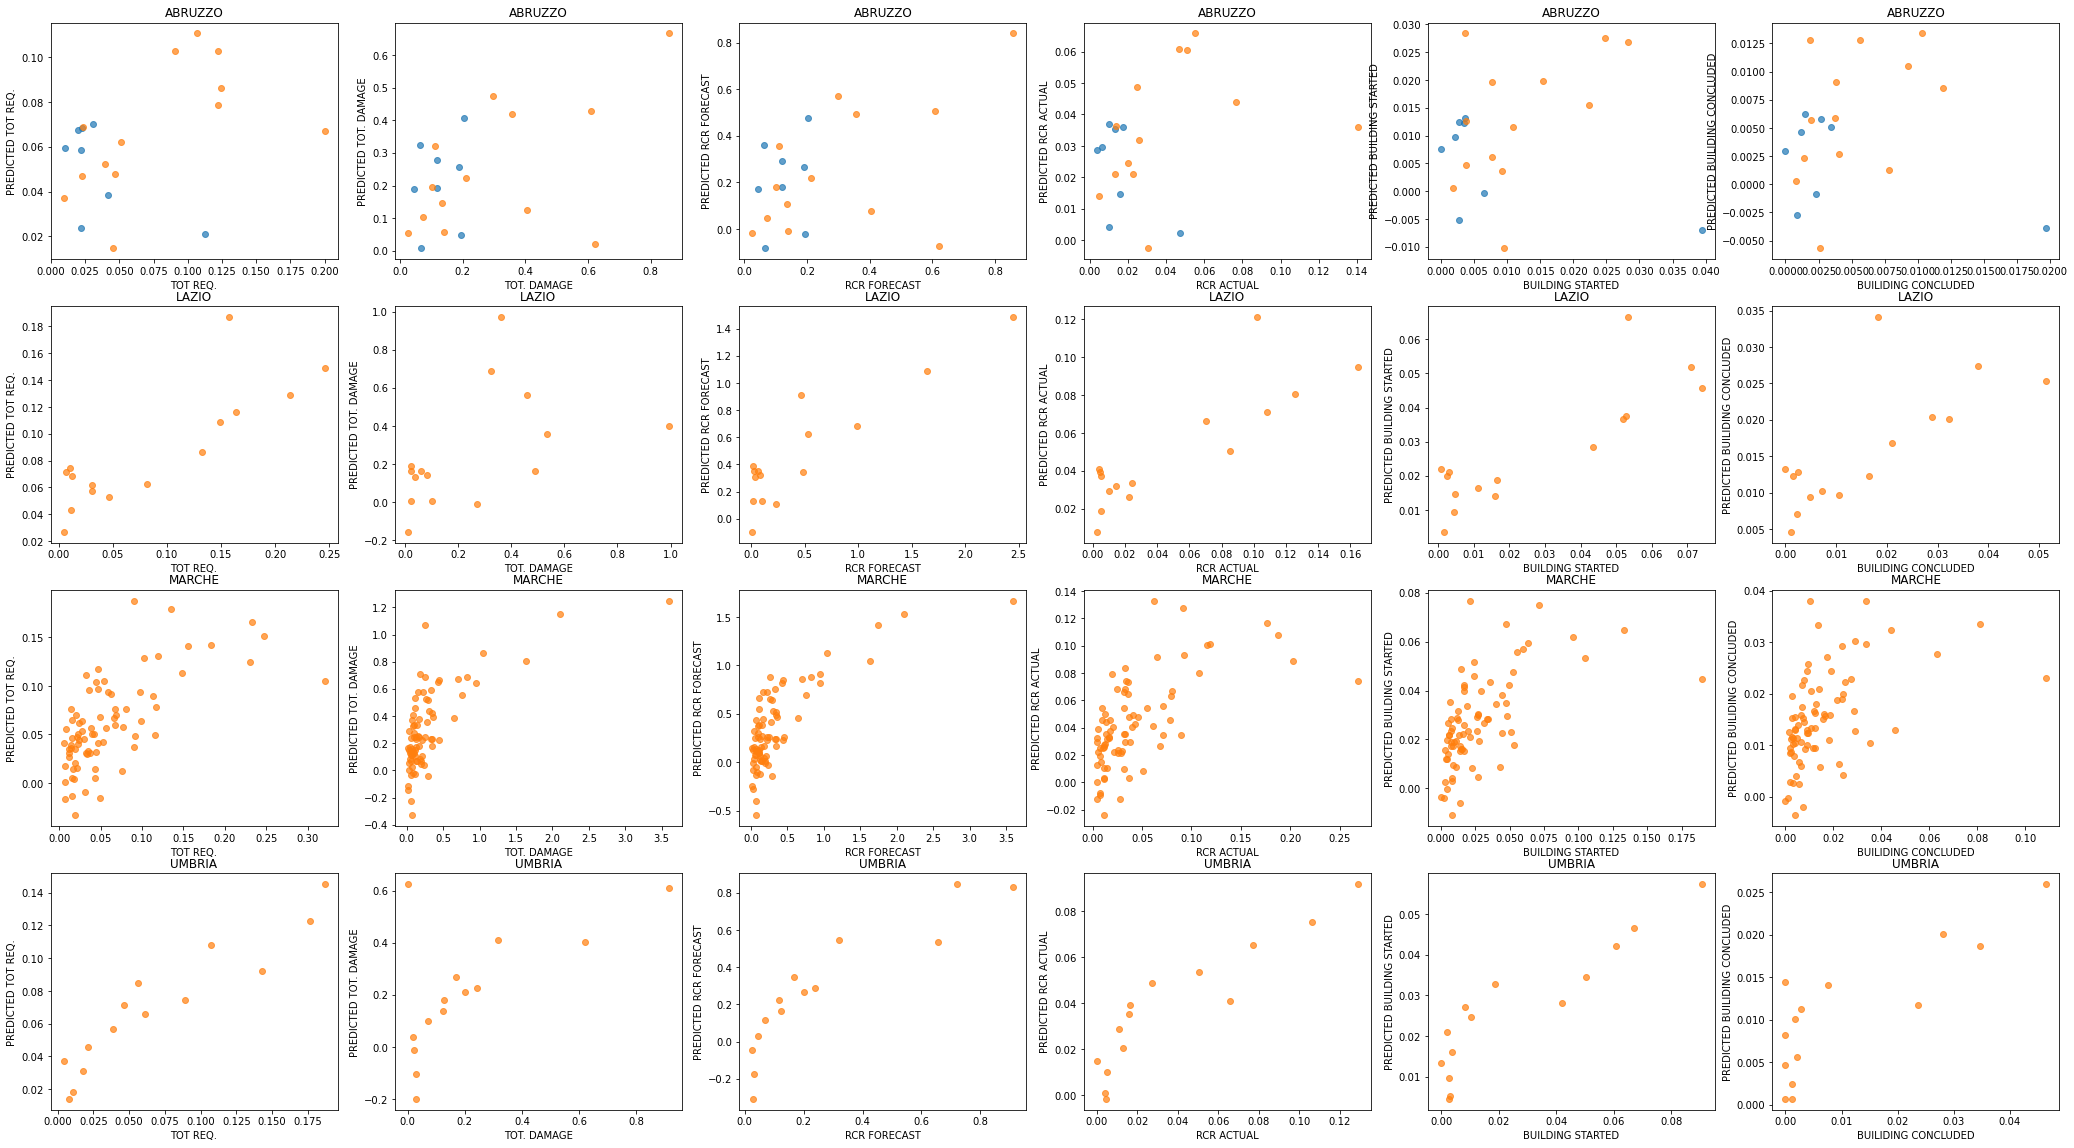

In [15]:
plt.figure(figsize = (6*len(ts), 20))
k = 1
for c in regioni_cols:
    for j in range(len(ts)):
        t = ts[j]
        y = xy.loc[:,t] 
        yp = models[j].predict(x)
        plt.subplot(len(regioni_cols),len(ts),k)
        z = xy.loc[xy[c]==1,:]
        plt.scatter(y[z.loc[z['CRATER']==0,:].index],yp[z.loc[z['CRATER']==0,:].index],alpha=0.7)
        plt.scatter(y[z.loc[z['CRATER']==1,:].index],yp[z.loc[z['CRATER']==1,:].index],alpha=0.7)
        plt.xlabel(y.name)
        plt.ylabel('PREDICTED '+y.name)
        plt.title(c)
        k += 1
plt.savefig('images/sisma16_regioni.pdf',bbox_inches='tight')  
plt.show()


C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


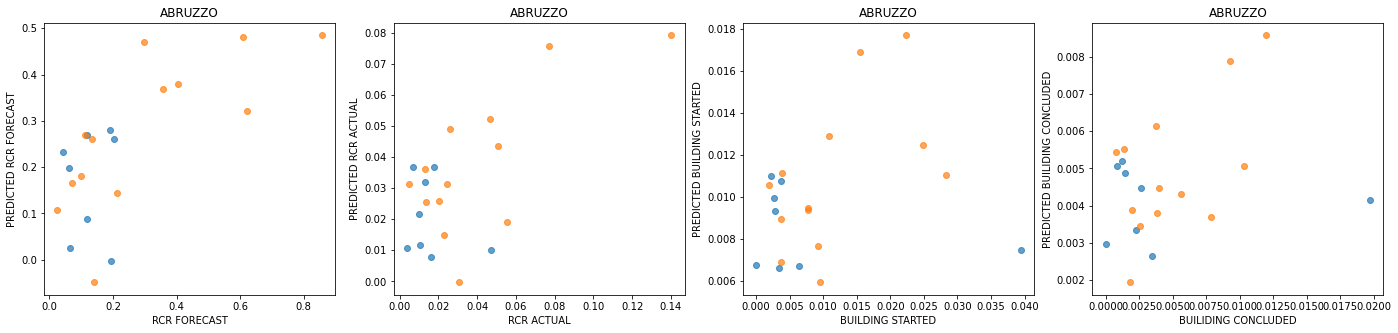

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


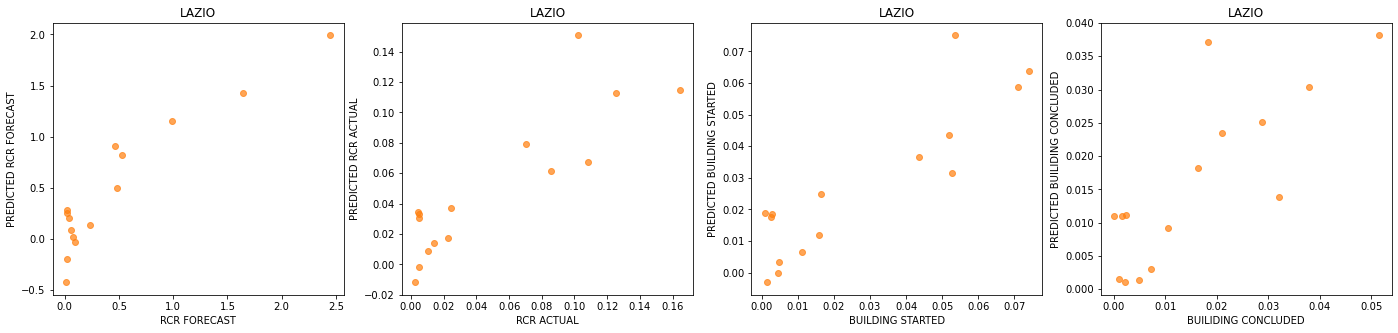

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


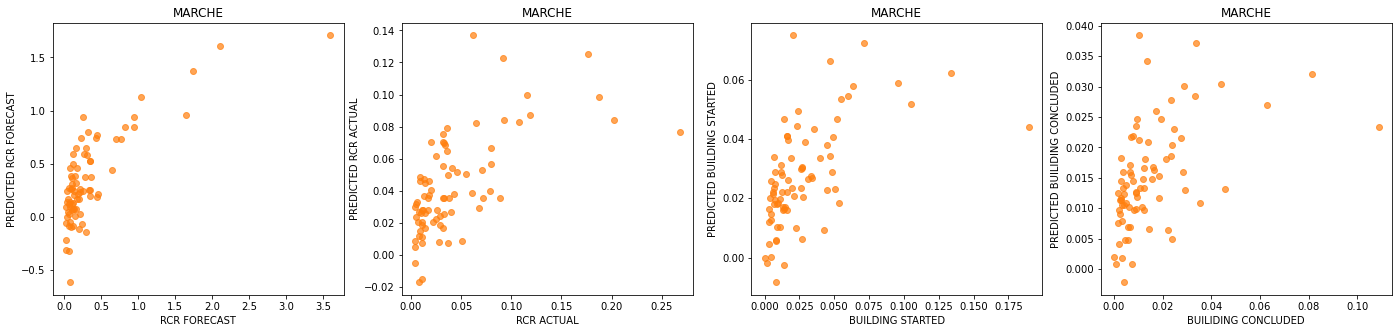

C:\Users\Marco\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


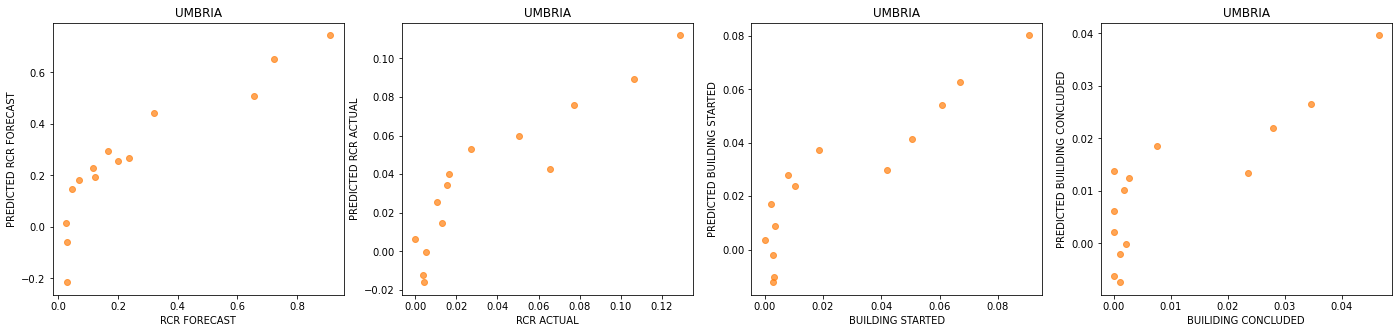

In [34]:
feat = [f for f in feat if f not in regioni_cols]
for r in regioni_cols:
    x = xy.loc[xy[r]==1,feat]
    x = sm.add_constant(x)
    models = []
    plt.figure(figsize = (6*len(ts), 5))
    for i in range(len(ts)):
        z = xy.loc[xy[r]==1,:]
        t = ts[i]
        y = z.loc[:,t] 
        model = sm.OLS(y, x).fit()
        models.append(model)
        yp = model.predict(x)
        plt.subplot(1,len(ts),i+1)
        plt.scatter(y[z.loc[z['CRATER']==0,:].index],yp[z.loc[z['CRATER']==0,:].index],alpha=0.7)
        plt.scatter(y[z.loc[z['CRATER']==1,:].index],yp[z.loc[z['CRATER']==1,:].index],alpha=0.7)
        plt.xlabel(y.name)
        plt.ylabel('PREDICTED '+y.name)
        plt.title(r)
    plt.savefig('images/sisma16_'+r+'.pdf',bbox_inches='tight')  
    plt.show()
    # REGIONI INDIVIDUALI
    stargazer = Stargazer(models)
    with open('models/sisma16_'+r+'.tex','w') as f:
        f.write(stargazer.render_latex())
    stargazer